### Integrantes:
`Bruno Palma`, `Felipe Leitão`, `João Pedro Libonati`

# Parte 1 - Pré processamento

## Character
```
Váriavel do tipo Character no R é equivalente a String no Python
A função type(<variável>) mostra o tipo da variável
```

In [211]:
nome = "maria"
type(nome)

str

In [212]:
nome

'maria'

## Numeric
```
No R o tipo Numeric é equivalente ao tipo float no Python, que é uma variável numerica que possui casa decimal
```

In [213]:
peso = 76.2
type(peso)

float

In [214]:
peso

76.2

## Integer
```
Integer no R e no Python são a mesma coisa 
```

In [215]:
qtdFilhos = 1
type(qtdFilhos)

int

In [216]:
qtdFilhos

1

## Logical
```
No R o tipo Logical é equivalente ao tipo bool no python, que é uma variável que só possui dois valores: "true" e "false"
```

In [217]:
temCarro = True
type(temCarro)

bool

In [218]:
temCarro

True

## Vectors
```
Um vetor é uma variável que possui vários valores do mesmo tipo independentes atribuidos à ela
No Python, vetores não são nativos, é preciso importar um pacote (por exemplo o numpy) para usar vetores
Aqui estão algumas maneiras de como utilizar o vetor
```

In [219]:
import numpy as np
pesos = np.array([76.2, 80.3, 90, 117.4])
pesos

array([ 76.2,  80.3,  90. , 117.4])

```
Como pode ver, o método array transformou o elemento 90 em float




Agora, fazemos o mesmo para String:
```

In [220]:
nomes = np.array(["maria","carlos","pedro"])
nomes

array(['maria', 'carlos', 'pedro'], dtype='<U6')

## Lists
```
Listas são que nem vetores, porém podem ser heterogêneas
pesosV e nomesV são listas e conseguimos fazer um dicionário com essas listas
```

In [221]:
pesosV = [76.2, 80.3, 90, 117.4]
nomesV = ["maria","carlos","pedro"]

myList = {"pesos": pesosV, "nomes":nomesV}
myList

{'pesos': [76.2, 80.3, 90, 117.4], 'nomes': ['maria', 'carlos', 'pedro']}

## Data frames
```
DataFrames são tabelas
É possível criar um DataFrame usando o pacote pandas
O comando abaixo está criando um DataFrame (myDataFrame) a partir de duas listas (vector1, vector2)
```

In [222]:
vector1 = [188.2, 181.3, 193.4]
vector2 = ["jeff", "roger", "andrew","brian"]
import pandas as pd
myDataFrame = pd.DataFrame({"heights": vector1, "firstNames": vector2})

ValueError: arrays must all be same length

```
Porém, só podem ser feitos DataFrames com listas de tamanhos iguais
Como aqui estavam de tamanhos diferentes, ocorreu o erro acima
```

In [223]:
print(myDataFrame)

   heights firstNames
0    188.2       jeff
1    181.3      roger
2    193.4     andrew
3    192.3      brian


```
Somente para mostrar que o DataFrame não foi instanciado
```

## Data Frames
```
Agora, com listas de tamanho igual, é possível criar o myDataFrame
```

In [2]:
vector1 = [188.2, 181.3, 193.4]
vector2 = ["jeff", "roger", "andrew"]
import pandas as pd
myDataFrame = pd.DataFrame({"heights": vector1, "firstNames": vector2})
print(myDataFrame)

   heights firstNames
0    188.2       jeff
1    181.3      roger
2    193.4     andrew


## Factors
```
Primeiro, preenchemos uma lista com valores "yes" e "no"
Depois, fatorizamos essa lista com ordem = true (O sort ordena a categorização em ordem alfanumérica)
O factorize fez dois vetores: um deles com índices e outro com os valores 
```

In [4]:
smoker = ["yes","no","yes","yes"]
smokerFactor = pd.factorize(smoker, sort= True)
smokerFactor

(array([1, 0, 1, 1], dtype=int64), array(['no', 'yes'], dtype=object))

## Missing Values
```
No Python usamos "None" para descrever a falta de um valor, enquanto que no R usamos NaN
No Python, não existe a função is.na do R. Portanto, fizemos a função aqui, IsNa
```

In [226]:
vector = [188.2, 181.3, 193.4, None]
print(vector)

[188.2, 181.3, 193.4, None]


In [227]:
def IsNa(vector):
    isna =[]
    for x in vector:
        if x == None:
            isna.append(True)
        else:
            isna.append(False)
    print(isna)
IsNa(vector)

[False, False, False, True]


## Subsettings
```
Subsetting é retornar um ou mais valores colocando o índice desejado vetor/lista
No Python o primeiro índice do vetor/lista é 0 e não 1 como no R
```

In [228]:
vector1 = [188.2, 181.3, 193.4, 192.3]
vector2 = ["jeff", "roger", "andrew", "brian"]
import pandas as pd
myDataFrame = pd.DataFrame({"heights": vector1, "firstNames": vector2})
vector1[0]

188.2

In [229]:
print([vector1[x] for x in [0,1,3]])

[188.2, 181.3, 192.3]


```
No Python não podemos selecionar os índices que nem no R
Dessa forma, acima tem um exemplo de uma forma para poder fazer essa seleção

­
```

## Subsettings
```
Agora, em DataFrames, precisamos informar o índice de início e o índice de término para mostrar a tabela
```

In [230]:
myDataFrame [0:1]

,heights,firstNames
0,188.2,jeff


```
Podemos, também pedir para retornar somente os firstNames do myDataFrame
```

In [231]:
pd.DataFrame(myDataFrame.firstNames)

,firstNames
0,jeff
1,roger
2,andrew
3,brian


```
E, também, podemos pedir para que ordene os valores por uma coluna
```

In [232]:
pd.DataFrame(myDataFrame.firstNames).sort_values("firstNames")

,firstNames
2,andrew
3,brian
0,jeff
1,roger


## Logical subsetting
```
Podemos pedir para que retorne somente as linhas que tiverem certo nome na coluna firstNames
```

In [233]:
myDataFrame[myDataFrame.firstNames =="jeff"]

,heights,firstNames
0,188.2,jeff


```
Ou como abaixo, para retornar as linhas que tiverem tanto de altura na coluna heights
```

In [234]:
myDataFrame[myDataFrame.heights < 190]

,heights,firstNames
0,188.2,jeff
1,181.3,roger


## merge()
```
Função do pandas que permite dar join em dois dataframes

O código abaixo mostra que, por padrão, o merge identifica duas colunas de mesmo nome e as combina automaticamente
```

In [235]:
df1 = pd.DataFrame({'Alunos': ['Pedro', 'Carlos', 'Maria', 'José'],'Ano': ['3º', '2º', '2º', '1º']})
df2 = pd.DataFrame({'Alunos': ['Pedro', 'Carlos', 'Maria', 'José'],'Media_Global': [3.5, 2.0, 5.5, 1.0]})
print(pd.merge(df1, df2))

   Alunos Ano  Media_Global
0   Pedro  3º           3.5
1  Carlos  2º           2.0
2   Maria  2º           5.5
3    José  1º           1.0


## concat()
```
Função que permite juntar dois FataFrames que se tornam extensão um do outro
```

In [236]:
alunos = pd.Series(['Pedro', 'Carlos', 'Maria', 'José'])
alunos_novos = pd.Series(['Matheus', 'Adriano', 'Leonardo', 'Victor'])
conc = [alunos, alunos_novos]
conc = pd.concat(conc, ignore_index = True)

print(conc)

0       Pedro
1      Carlos
2       Maria
3        José
4     Matheus
5     Adriano
6    Leonardo
7      Victor
dtype: object


## replace()
```
Essa função troca valores do DataFrame
São dois argumentos: (valores de agora, valores novos)
Caso o objetivo é trocar somente valores de uma coluna, é necessário indicar com:
DataFrame['nome_da_coluna'].replace([valor1,valor2,valor3], [valor4, valor5, valor6])
```

In [237]:
df3 = pd.merge(df1, df2)
df3['Alunos'].replace('Pedro','João')

0      João
1    Carlos
2     Maria
3      José
Name: Alunos, dtype: object

## subset()
```
Como não foi encontrado nenhuma função subset em pandas ou DataFrame, usaremos a função query porque há uma relação entre os conceitos
```

In [238]:
df3.query("Media_Global > 5")

,Alunos,Ano,Media_Global
2,Maria,2º,5.5


## groupby()
```
Essa função serve para separar os dados em grupos, usando algum critério
```

In [263]:
df_carros = pd.DataFrame({'Carros': ['Chevette', 'Chevette','R34', 'Chevette', 'R34', 'Corolla', 'Chevette', 'Corolla'],
                          'Máxima_Velocidade': [122., 119., 292., 130., 302., 193., 126., 187.]})

df_carros.groupby(['Carros']).mean()

,Máxima_Velocidade
Carros,
Chevette,124.25
Corolla,190.00
R34,297.00


## Conversão de Tipos
```
É possível converter uma variável para outro tipo indicando antes do parênteses o tipo desejado
```

In [240]:
print(int(.9)) # float => int
print(int(1.9)) # float => int
print(str(3.22442)) # float => string
print(float("4.243")) # string => float

0
1
3.22442
4.243


# Parte 2 - Análise Descritiva

```
Importamos datasets de sklearn, pandas e numpy
Carregamos o dataset iris
```

In [241]:
from sklearn import datasets
import pandas as pd
import numpy as np
iris = datasets.load_iris()

```
Agora, transformamos objeto iris em um DataFrame chamado df, com os nomes das colunas sendo "iris['feature_names'] + ['target']"
```

In [242]:
df = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                 columns= iris['feature_names'] + ['target'])

```
Assim, chegamos neste resultado:
```

In [243]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


```
Agora, queremos trocar os valores de target (0,1,2) pelos valores "iris['target_names']"
```

In [244]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [245]:
df['target'] = df['target'].replace([0,1,2],iris['target_names'])

In [246]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


```
Podemos mostrar os tipos das colunas:
```

In [247]:
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                object
dtype: object

```
Podemos renomear as colunas
```

In [248]:
df.columns = ['sepal_length','sepal_width','petal_length','petal_width','target']

In [249]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
target           object
dtype: object

## Gráficos
```
Podemos usar DataFrame.plot() para exibir um histograma
E também mudar suas características como abaixo:
```

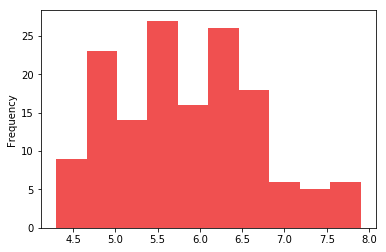

In [250]:
x = df['sepal_length'].plot(kind='hist',color = '#f05050')

```
É possível colocar um título no gráfico por DataFrame.set_title('titulo_do_grafico')
Mudando o kind para box, obtemos um boxplot
```

Text(0.5, 1.0, 'Distribuição sepal_length')

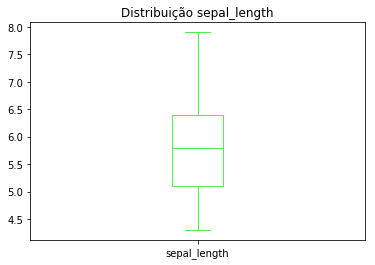

In [251]:
y = df['sepal_length'].plot(kind='box',color = '#50f050')
y.set_title('Distribuição sepal_length')

```
Agora um gráfico comparando dois valores da sépala, sepal_length e sepal_width, com um scatterplot colorido
```

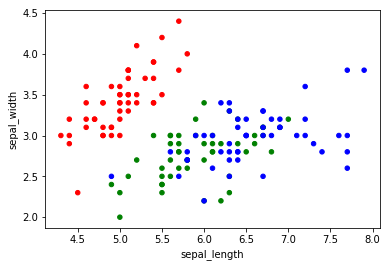

In [252]:
x = df.plot.scatter(x='sepal_length',y='sepal_width',
               color=df['target'].replace(df['target'].unique(),
                ['red','green','blue']))

```
Nesse gráfico podemos ver é possível separar que a "setosa" está em uma área do gráfico diferente das "versicolor" e "virginica"
Agora, comparando dois valores da pétala, petal_length e petal_width, e colorimos dependendo do df['target']
```

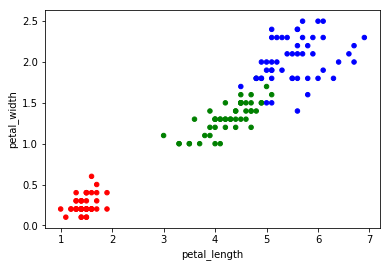

In [253]:
x = df.plot.scatter(x='petal_length',y='petal_width',
                color=df['target'].replace(df['target'].unique(),
                ['red','green','blue']))

```
E, ao comparar estes dois últimos gráficos, é possível observar que as pétalas estão bem mais correlacionadas pelas pétalas do que pelas sépalas
```

```
Tem outra forma de criar um scatterplot, importamos o pacote seaborn como sns para gerá-lo de forma mais simples
```

Text(0, 0.5, 'Petal Width')

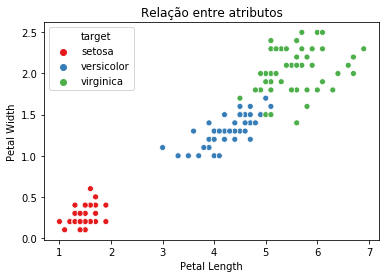

In [254]:
import seaborn as sns
x = sns.scatterplot(x='petal_length', y='petal_width', data=df, hue='target', palette="Set1")
x.set_title('Relação entre atributos')
x.set_xlabel("Petal Length")
x.set_ylabel("Petal Width")